In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [11]:
train = pd.read_csv('./LP-IV-datasets/MNIST/mnist_train.csv')
test = pd.read_csv('./LP-IV-datasets/MNIST/mnist_test.csv')

In [12]:
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values

In [22]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

In [24]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [25]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [29]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [40]:
model = Sequential()

model.add(Dense(128, input_shape=(784, ), activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation = 'softmax'))

model.compile(optimizer = 'sgd', loss = SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
Total params: 111344 (434.94 KB)
Trainable params: 111344 (434.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
meraModel = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 1s 610us/step - loss: 0.9488 - accuracy: 0.7116 - val_loss: 0.3444 - val_accuracy: 0.9031
Epoch 2/10
1875/1875 [==============================] - 1s 533us/step - loss: 0.4114 - accuracy: 0.8825 - val_loss: 0.2526 - val_accuracy: 0.9280
Epoch 3/10
1875/1875 [==============================] - 1s 532us/step - loss: 0.3217 - accuracy: 0.9093 - val_loss: 0.2068 - val_accuracy: 0.9396
Epoch 4/10
1875/1875 [==============================] - 1s 524us/step - loss: 0.2679 - accuracy: 0.9241 - val_loss: 0.1795 - val_accuracy: 0.9468
Epoch 5/10
1875/1875 [==============================] - 1s 524us/step - loss: 0.2343 - accuracy: 0.9342 - val_loss: 0.1626 - val_accuracy: 0.9538
Epoch 6/10
1875/1875 [==============================] - 1s 529us/step - loss: 0.2077 - accuracy: 0.9414 - val_loss: 0.1540 - val_accuracy: 0.9542
Epoch 7/10
1875/1875 [==============================] - 1s 534us/step - loss: 0.1846 - accuracy: 0.9488 - val_loss: 0.1329 -

In [44]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 358us/step - loss: 0.1172 - accuracy: 0.9647


In [45]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Value')

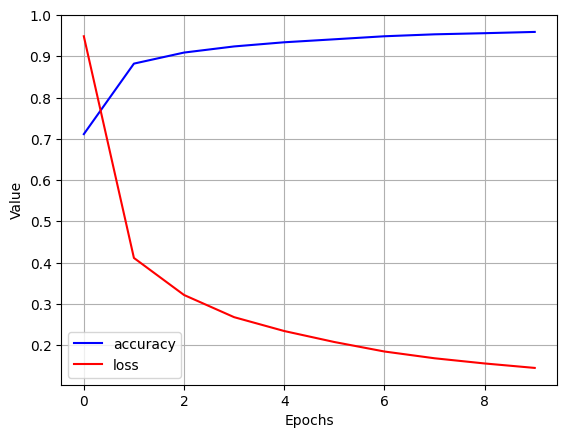

In [55]:
plt.plot(meraModel.history['accuracy'], color = 'blue', label = 'accuracy')
plt.plot(meraModel.history['loss'], color = 'red', label = 'loss')
plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Value')

Text(0, 0.5, 'Value')

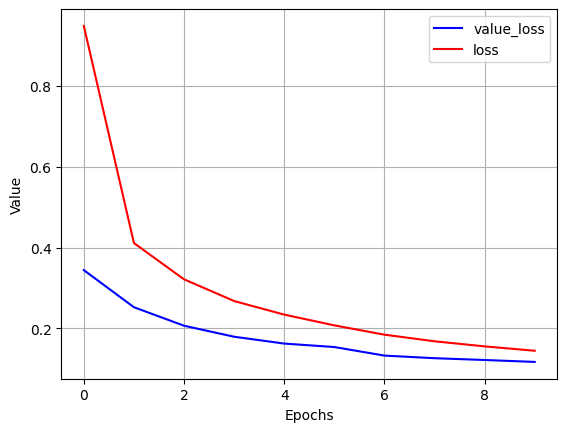

In [57]:
plt.plot(meraModel.history['val_loss'], color = 'blue', label = 'value_loss')
plt.plot(meraModel.history['loss'], color = 'red', label = 'loss')
plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Value')